<a href="https://colab.research.google.com/github/Omid-Hassasfar/CHPC2024-QuantumComputing/blob/main/CHPC2024_QC_Qiskit_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

In [ ]:
!pip install qiskit[visualization]  --quiet  # Install Qiskit with visualization support
!pip install qiskit-ibm-runtime  --quiet     # Install Qiskit IBM Runtime for accessing IBM Quantum services
!pip install qiskit-aer  --quiet             # Install Qiskit Aer for high-performance quantum simulations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 80.4 MB/s eta 0:00:00


## Importing Packages!

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sympy as sy

import qiskit
import qiskit_ibm_runtime
import qiskit_aer
import matplotlib

print(f'Qiskit: {qiskit.__version__}')
print(f'Qiskit Aer: {qiskit_aer.__version__}')
print(f'Qiskit IBM Runtime: {qiskit_ibm_runtime.__version__}')
print()
print("Numpy version:", np.__version__)
print("Scipy version:", sp.__version__)
print("Sympy version:", sy.__version__)
print("Matplotlib version:", matplotlib.__version__)
print()
!python --version

Qiskit: 1.2.4
Qiskit Aer: 0.15.1
Qiskit IBM Runtime: 0.33.2

Numpy version: 1.26.4
Scipy version: 1.13.1
Sympy version: 1.13.1
Matplotlib version: 3.8.0

Python 3.10.12


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile

from qiskit.result import marginal_distribution

from qiskit.providers.basic_provider import BasicProvider

from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere, plot_state_city

from qiskit.quantum_info import Statevector, Operator, SparsePauliOp, concurrence

from qiskit.circuit.library import PauliEvolutionGate, UGate, QFT

from qiskit_aer import AerSimulator, StatevectorSimulator, UnitarySimulator

from math import pi, cos, sin

from random import randrange

Physical implementations of Qubits :
https://en.wikipedia.org/wiki/Qubit#Physical_implementations

## Simple example with BasicProvider: Python-based Simulators
these are ideal simulators, meaning they do not include noise or errors in their simulation. These simulators are useful for quick testing and validation of quantum circuits without the complexities of real-world quantum device noise.


In [ ]:
backend = BasicProvider().get_backend('basic_simulator')

In [ ]:
# Create a Quantum Circuit with 1 qubit and 1 classical bit
qr = QuantumRegister(1, 'q0')
cr = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(qr, cr)

# Add a Hadamard gate on qubit 0
qc.h(0)

# Measure qubit 0 to classical bit 0
qc.measure(0, 0)

# Transpile the circuit for the backend
qc_tr = transpile(qc, backend)

# Execute the circuit on the basic simulator backend
job = backend.run(qc_tr, shots = 1024)

# Get the result
result = job.result()
qc.draw()

┌───┐┌─┐
  q0: ┤ H ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0

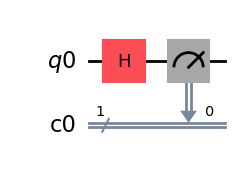

In [ ]:
qc.draw('mpl')

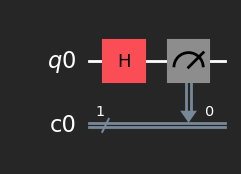

In [ ]:
# Draw the transpiled circuit + change the style
qc_tr.draw('mpl', style = 'iqp-dark')

In [ ]:
# Get the counts (number of times each outcome was measured)
counts = result.get_counts(qc_tr)
counts

{'0': 529, '1': 495}

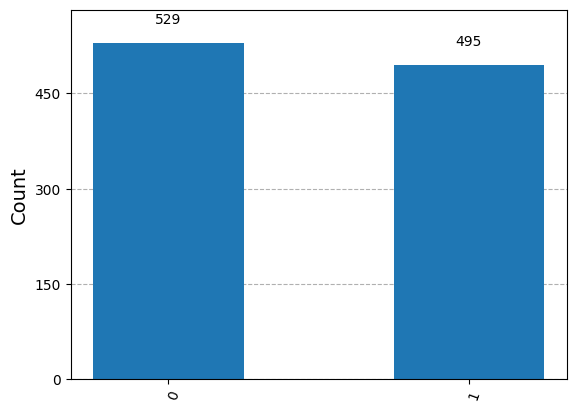

In [ ]:
# Plot the histogram of results
plot_histogram(counts)

### Another example with 2 qubit with BasicProvider: Python-based Simulators

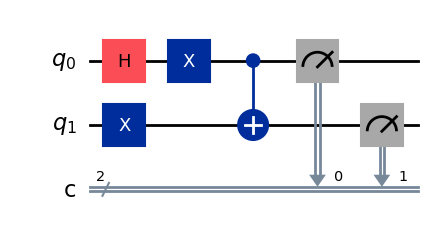

In [ ]:
# Create a Quantum Register with 2 qubits and a Classical Register with 2 bits
qr2 = QuantumRegister(2, 'q')
cr2 = ClassicalRegister(2, 'c')
qc2 = QuantumCircuit(qr2, cr2)

# Apply a Hadamard gate to qubit 0
qc2.h(0)

qc2.x(0)
qc2.x(1)

# Apply a CNOT gate to qubit 1 controlled by qubit 0 (creates entanglement)
qc2.cx(0, 1)

# Measure the qubits
qc2.measure([0, 1], [0, 1])

# Transpile the circuit for the backend
qc2_tr = transpile(qc2, backend)

# Execute the circuit on the basic simulator backend with different shots
job2 = backend.run(qc2_tr, shots=2048)

# Get the result
result2 = job2.result()

# Draw the circuit
qc2.draw('mpl')

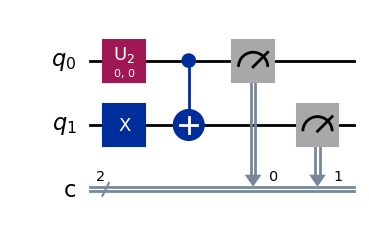

In [ ]:
# Draw the  transpiled circuit
qc2_tr.draw('mpl')

https://github.com/Omid-Hassasfar/qiskit-tutorial-Archive/blob/master/tutorials/circuits/3_summary_of_quantum_operations.ipynb

https://docs.quantum.ibm.com/api/qiskit/circuit_library

https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.UGate

https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.U1Gate

https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.U2Gate

https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.U3Gate

https://learning.quantum.ibm.com/tutorial/explore-gates-and-circuits-with-the-quantum-composer

In [ ]:
# Get the counts (number of times each outcome was measured)
counts2 = result2.get_counts(qc2_tr)
counts2

{'10': 1022, '01': 1026}

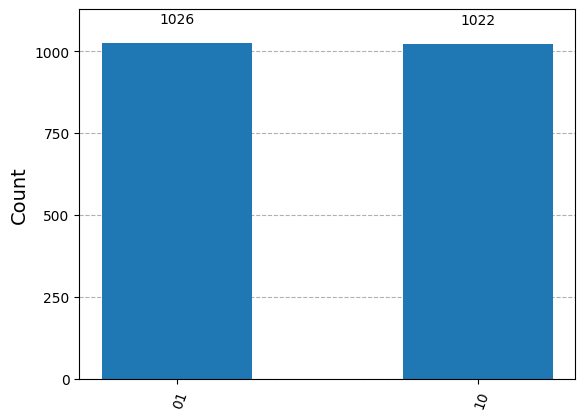

In [ ]:
# Plot the histogram of results
plot_histogram(counts2)

### How to check Quantum Circuit Properties

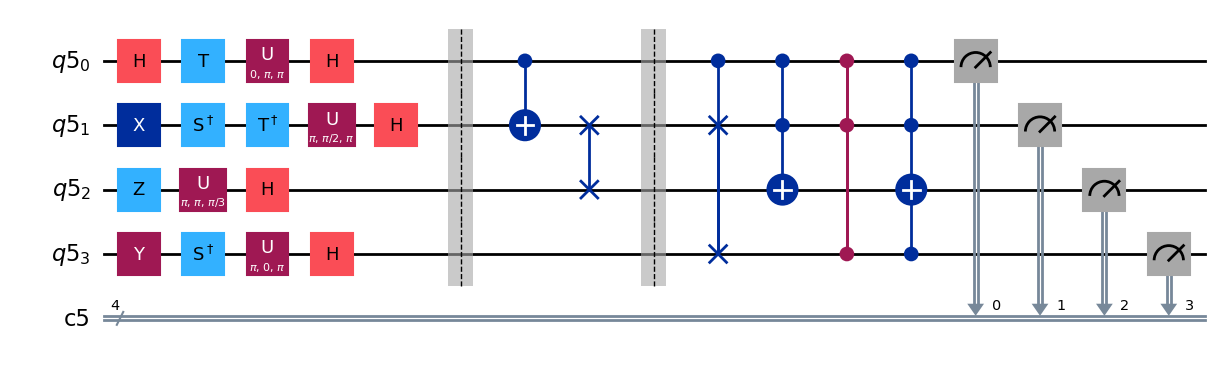

In [ ]:
qr5 = QuantumRegister(4, 'q5')
cr5 = ClassicalRegister(4, 'c5')
qc5 = QuantumCircuit(qr5,cr5)

qc5.h(0)
qc5.x(1)
qc5.z(2)
qc5.y(3)
qc5.sdg(1)
qc5.sdg(3)
qc5.t(0)
qc5.tdg(1)
qc5.u(0, np.pi, np.pi, 0)
qc5.u(np.pi, np.pi/2, np.pi, 1)
qc5.u(np.pi, np.pi, np.pi/3, 2  )
qc5.u(np.pi, 0, np.pi, 3)
qc5.h(qr5[0:4])

qc5.barrier()
qc5.cx(0, 1)
qc5.swap(1, 2)

qc5.barrier()
qc5.cswap(0, 1, 3)
qc5.ccx(0, 1, 2)
qc5.ccz(0, 1, 3)
qc5.mcx([0,1,3],2)  # The multi-cX gate

# Measure the qubits
qc5.measure([0, 1, 2, 3], [0, 1, 2, 3])

qc5.draw('mpl')

In [ ]:
qc5.num_qubits

4

In [ ]:
qc5.width()  # Returns the sum of qubits wires and classical wires in a circuit

8

In [ ]:
qc5.size() # Returns the total number of gate operations in a circuit ( raw count of operations)

26

In [ ]:
qc5.count_ops() # This will print the number of single qubit gates and two qubit gates

OrderedDict([('h', 5),
             ('u', 4),
             ('measure', 4),
             ('sdg', 2),
             ('barrier', 2),
             ('x', 1),
             ('z', 1),
             ('y', 1),
             ('t', 1),
             ('tdg', 1),
             ('cx', 1),
             ('swap', 1),
             ('cswap', 1),
             ('ccx', 1),
             ('ccz', 1),
             ('mcx', 1)])

The *depth* of a quantum circuit is a measure of how many “layers” of quantum gates, executed in parallel, it takes to complete the computation defined by the circuit.

https://docs.quantum.ibm.com/api/qiskit/1.0/circuit#quantum-circuit-api

In [ ]:
qc5.depth() # Returns the depth (critical path) of a circuit if directives such as barrier were removed

12

In [ ]:
qc5.num_nonlocal_gates()

6

## Statevector class from the quantum_info module in Qiskit

This type of simulation is ideal (i.e., without noise) and is particularly useful for understanding the theoretical behavior of quantum circuits

The statevector is a complex vector that encodes the amplitudes of all possible quantum states, providing a full representation of the quantum system's state.

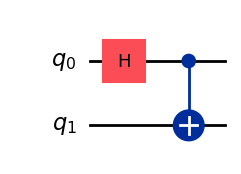

In [ ]:
Phi_P = QuantumCircuit(2)
Phi_P.h(0)
Phi_P.cx(0, 1)
# Phi_p.measure_all()
Phi_P.draw('mpl')

In [ ]:
Statevector(Phi_P)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [ ]:
sy.Matrix(Statevector(Phi_P))

Matrix([
[0.707106781186547],
[                0],
[                0],
[0.707106781186547]])

In [ ]:
Statevector(Phi_P).draw('latex')

<IPython.core.display.Latex object>

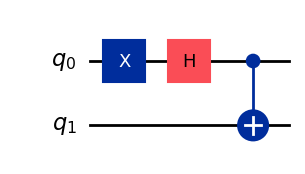

<IPython.core.display.Latex object>

In [ ]:
Phi_M = QuantumCircuit(2)
Phi_M.x(0)
Phi_M.h(0)
Phi_M.cx(0, 1)
display(Phi_M.draw('mpl'))
Statevector(Phi_M).draw('latex')

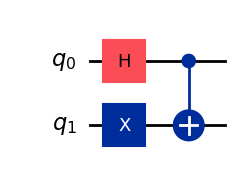

<IPython.core.display.Latex object>

In [ ]:
Psi_P = QuantumCircuit(2)
Psi_P.x(1)
Psi_P.h(0)
Psi_P.cx(0, 1)
display(Psi_P.draw('mpl'))
Statevector(Psi_P).draw('latex')

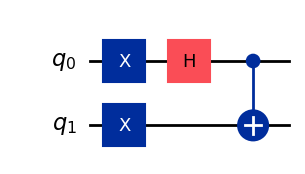

<IPython.core.display.Latex object>

In [ ]:
Psi_M = QuantumCircuit(2)
Psi_M.x(1)
Psi_M.x(0)
Psi_M.h(0)
Psi_M.cx(0, 1)
display(Psi_M.draw('mpl'))
Statevector(Psi_M).draw('latex')

In [ ]:
# # Get the statevector and multiply by -1
# Psi_M = -1 * Statevector(Psi_M)

# # Display the modified statevector in LaTeX format
# Psi_M.draw('latex')

**Bell states**:
https://en.wikipedia.org/wiki/Bell_state

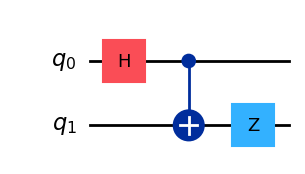

<IPython.core.display.Latex object>

In [ ]:
Phi_M2 = QuantumCircuit(2)

Phi_M2.h(0)
Phi_M2.cx(0, 1)
Phi_M2.z(1)

# Display the circuit
display(Phi_M2.draw('mpl'))
# Display the statevector in LaTeX
Statevector(Phi_M2).draw('latex')

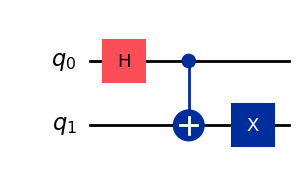

<IPython.core.display.Latex object>

In [ ]:
Psi_P2 = QuantumCircuit(2)

Psi_P2.h(0)
Psi_P2.cx(0, 1)
Psi_P2.x(1)

# Display the circuit
display(Psi_P2.draw('mpl'))
# Display the statevector in LaTeX
Statevector(Psi_P2).draw('latex')

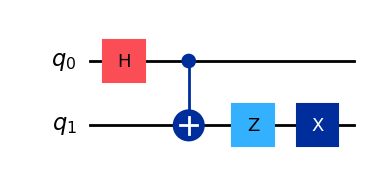

<IPython.core.display.Latex object>

In [ ]:
Psi_M2 = QuantumCircuit(2)

Psi_M2.h(0)
Psi_M2.cx(0, 1)
Psi_M2.z(1)
Psi_M2.x(1)

# Display the circuit
display(Psi_M2.draw('mpl'))
# Display the statevector in LaTeX
Statevector(Psi_M2).draw('latex')

### The concurrence
The concurrence as an entanglement measures for a given state is zero iff the state is separable and it is equal to one for the maximal entangled states. It is defined for two-qubit pure and mixed states.

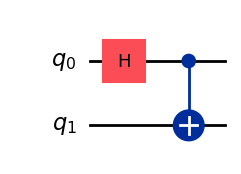

<IPython.core.display.Latex object>

The concurrence is : 1.0000000000000002


In [ ]:
qc_max = QuantumCircuit(2)

qc_max.h(0)
qc_max.cx(0, 1)

display(qc_max.draw('mpl'))
# Display the resulting statevector in LaTeX format
state_max = Statevector(qc_max)
display(state_max.draw('latex'))
print("The concurrence is :" , concurrence(state_max))

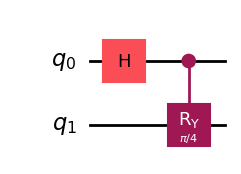

<IPython.core.display.Latex object>

The concurrence is : 0.3826834323650913


In [ ]:
qc_partial = QuantumCircuit(2)
qc_partial.h(0)
# Apply a controlled-Ry rotation gate with a specific angle
theta = np.pi / 4  # Change this angle to adjust the degree of entanglement
qc_partial.cry(theta, 0, 1)
# Display the quantum circuit
display(qc_partial.draw('mpl'))
# Display the resulting statevector in LaTeX format
state_partial = Statevector(qc_partial)
display(state_partial.draw('latex'))
print("The concurrence is :" , concurrence(state_partial))

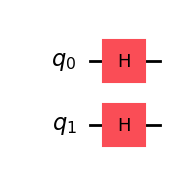

<IPython.core.display.Latex object>

The concurrence is : 0.0


In [ ]:
qc_sep = QuantumCircuit(2)
qc_sep.h(0)
qc_sep.h(1)
# Display the quantum circuit
display(qc_sep.draw('mpl'))
# Display the resulting statevector in LaTeX format
state_sep = Statevector(qc_sep)
display(state_sep.draw('latex'))
print("The concurrence is :" , round(concurrence(state_sep), 7))

### Arbitrary state vector

In [ ]:
sv = Statevector([1/2, 0, 0, -1/2, 1/2, 0, 0, -1/2])
sv

Statevector([ 0.5+0.j,  0. +0.j,  0. +0.j, -0.5+0.j,  0.5+0.j,  0. +0.j,
              0. +0.j, -0.5+0.j],
            dims=(2, 2, 2))


In [ ]:
sv.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
sv.probabilities_dict()

{'000': 0.25, '011': 0.25, '100': 0.25, '111': 0.25}

In [ ]:
probs_dict = sv.probabilities_dict()

total_probability = sum(probs_dict.values())
print("Total probability:", total_probability)

Total probability: 1.0


In [ ]:
sv.is_valid()

True

In [ ]:
sv2 = Statevector([1/2, 0, 0, -1/2, 1/2, 0, 0, -1/3])
sv2

Statevector([ 0.5       +0.j,  0.        +0.j,  0.        +0.j,
             -0.5       +0.j,  0.5       +0.j,  0.        +0.j,
              0.        +0.j, -0.33333333+0.j],
            dims=(2, 2, 2))


In [ ]:
sv2.is_valid()

False

In [ ]:
sv2.probabilities().sum()

0.8611111111111112

In [ ]:
# Calculate the norm of the vector
norm = np.linalg.norm(sv2)

# Normalize the vector
normalized_vector = sv2 / norm
normalized_vector

Statevector([ 0.53881591+0.j,  0.        +0.j,  0.        +0.j,
             -0.53881591+0.j,  0.53881591+0.j,  0.        +0.j,
              0.        +0.j, -0.3592106 +0.j],
            dims=(2, 2, 2))


In [ ]:
normalized_vector.probabilities().sum()

1.0

In [ ]:
normalized_vector.is_valid()

True

### classmethod from_label(label)

In [ ]:
zero_state = Statevector.from_label('0')
print(zero_state)
zero_state.draw('latex')

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

In [ ]:
one_state = Statevector.from_label('1')
print(one_state)
one_state.draw('latex')

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

In [ ]:
plus_state = Statevector.from_label("+")
print(plus_state)
plus_state.draw('latex')

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

In [ ]:
minus_state = Statevector.from_label("-")
print(minus_state)
minus_state.draw('latex')

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

In [ ]:
right_state = Statevector.from_label("r")
print(right_state)
right_state.draw('latex')

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


<IPython.core.display.Latex object>

In [ ]:
left_state = Statevector.from_label("l")
print(left_state)
left_state.draw('latex')

Statevector([0.70710678+0.j        , 0.        -0.70710678j],
            dims=(2,))


<IPython.core.display.Latex object>

In [ ]:
psi = Statevector.from_label('0+l') # This is a tensor product
print(psi)
psi.draw('latex')

Statevector([0.5+0.j , 0. -0.5j, 0.5+0.j , 0. -0.5j, 0. +0.j , 0. +0.j ,
             0. +0.j , 0. +0.j ],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

In [ ]:
sy.Matrix(psi)

Matrix([
[   0.5],
[-0.5*I],
[   0.5],
[-0.5*I],
[     0],
[     0],
[     0],
[     0]])

In [ ]:
# Probabilities for measuring all qubits
probs = psi.probabilities()
print('probs: {}'.format(probs),"\n")

# Probabilities for measuring only qubit-0
probs_qubit_0 = psi.probabilities([0])
print('Qubit-0 probs: {}'.format(probs_qubit_0))

# Probabilities for measuring only qubit-1
probs_qubit_1 = psi.probabilities([1])
print('Qubit-1 probs: {}'.format(probs_qubit_1))

# Probabilities for measuring only qubit-2
probs_qubit_2 = psi.probabilities([2])
print('Qubit-2 probs: {}'.format(probs_qubit_2))

probs: [0.25 0.25 0.25 0.25 0.   0.   0.   0.  ] 

Qubit-0 probs: [0.5 0.5]
Qubit-1 probs: [0.5 0.5]
Qubit-2 probs: [1. 0.]


## Operator class from quantum_info (Matrix operator class or Gate)
gives a single matrix representation of all gates in the circuit

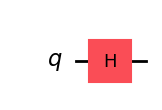

In [ ]:
qc4 = QuantumCircuit(1)
qc4.h(0)
# qc4.measure_all()
qc4.draw('mpl')

In [ ]:
Operator(qc4)

Operator([[ 0.70710678+0.j,  0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))


In [ ]:
sy.Matrix(Operator(qc4))

Matrix([
[0.707106781186547,  0.707106781186547],
[0.707106781186547, -0.707106781186547]])

In [ ]:
Operator(qc4).draw('latex')

<IPython.core.display.Latex object>

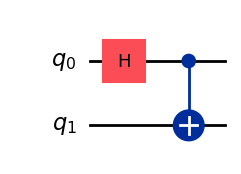

In [ ]:
qc5 = QuantumCircuit(2)
qc5.h(0)
qc5.cx(0, 1)
# qc4.measure_all()
qc5.draw('mpl')

In [ ]:
Operator(qc5)

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
            0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
           -0.70710678+0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
            0.        +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [ ]:
Operator(qc5).draw('latex')

<IPython.core.display.Latex object>

## Qiskit Aer Simulator:
Qiskit Aer is high-performance quantum computing simulators with realistic noise models. It provides interfaces to run quantum circuits with or without noise using multiple different simulation methods. Qiskit Aer supports leveraging MPI and running on GPUs to improve the performance of simulation.
https://qiskit.github.io/qiskit-aer/getting_started.html   
https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html

{'00': 520, '11': 504} 



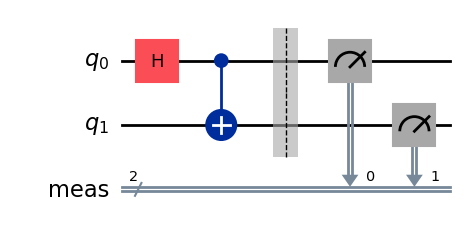

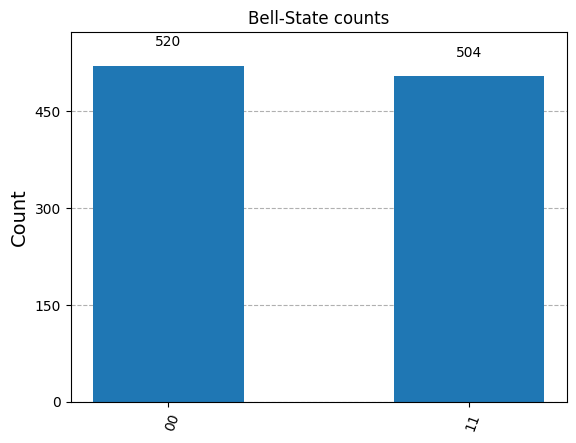

In [ ]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts,"\n")

# Draw the circuit
display(circ.draw('mpl'))
print()
plot_histogram(counts, title='Bell-State counts')

In [ ]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_statevector()

# Transpile for simulator
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()
statevector = result.get_statevector(circ)
statevector.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_unitary()

# Transpile for simulator
simulator = AerSimulator(method = 'unitary')
circ = transpile(circ, simulator)

# Run and get unitary
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)
unitary.draw('latex')

<IPython.core.display.Latex object>

## Visualizations (qiskit.visualization)
https://docs.quantum.ibm.com/api/qiskit/visualization

## Qiskit Circuit Library
The Qiskit circuit library is a collection of valuable, well-studied circuits and gates that Qiskit users can easily plug into their quantum circuits.

### Quantum Fourier Transform (QFT)

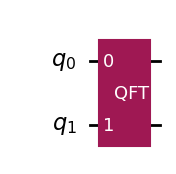

<IPython.core.display.Latex object>

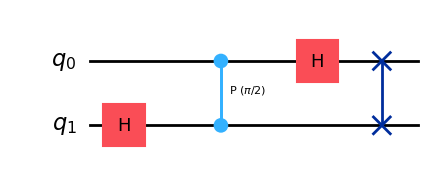

In [ ]:
qft = QFT(2)
display(qft.draw('mpl'))
print()
display(Statevector(qft).draw('latex'))
print()
display(qft.decompose().draw('mpl'))

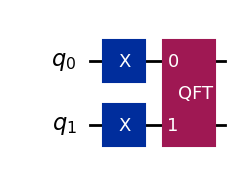

<IPython.core.display.Latex object>

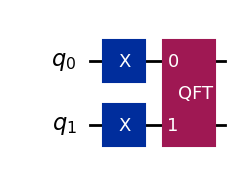

In [ ]:
qc6 = QuantumCircuit(2)
qc6.x(0)
qc6.x(1)
# qc6.barrier()
qc6.append(qft, [0, 1])  # Apply the QFT to qubits 0 and 1
display(qc6.draw('mpl'))
print()
display(Statevector(qc6).draw('latex'))
print()
display(qc6.decompose(3).draw('mpl'))

### PauliEvolutionGate :
Time-evolution of an operator consisting of Paulis.

Time evolution circuits allow us to evolve a quantum state in time.
Time evolution circuits are also a fundamental building block of chemistry wave functions—e.g., for unitary coupled-cluster trial states—and of the QAOA algorithm we use for optimization problems.


Time evolution circuits are also a fundamental building block of chemistry wave functions—e.g., for unitary coupled-cluster trial states—and of the QAOA algorithm we use for optimization problems.

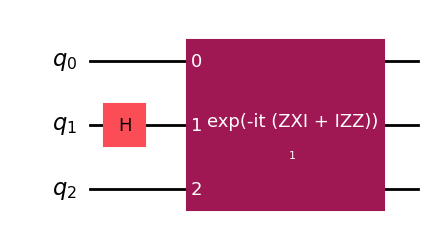

In [ ]:
# build the evolution gate
hamiltonian = SparsePauliOp(["ZXI", "IZZ"], [0.2, 0.3])

# prepare an initial state with a Hamadard on the middle qubit
state = QuantumCircuit(3)
state.h(1)

evolution = PauliEvolutionGate(hamiltonian, time=1)

# evolve state by appending the evolution gate
# state.append(evolution)
state.append(evolution, [0, 1, 2])

state.draw('mpl')

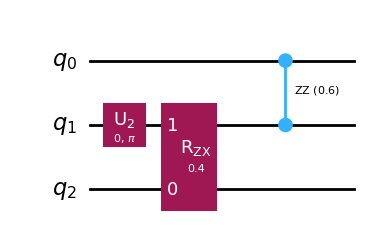

In [ ]:
state.decompose().draw('mpl')

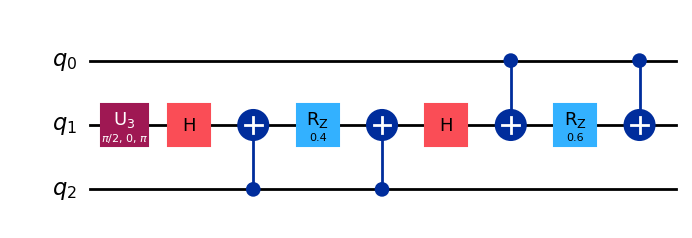

In [ ]:
state.decompose(reps=2).draw('mpl')

## Superdense coding

Asja has two bits of classical information: $$ a,b \in \{0,1\} $$.
There are four possible values for the pair $$ (a,b) $$:  $$ (0,0), (0,1), (1,0),\mbox{ or } (1,1) $$.
If $a$ is 1, then Asja applies z-gate, i.e., $Z$, to her qubit.
If $b$ is 1, then Asja applies x-gate (NOT operator) to her qubit.
Then, Asja sends her qubit to Balvis.

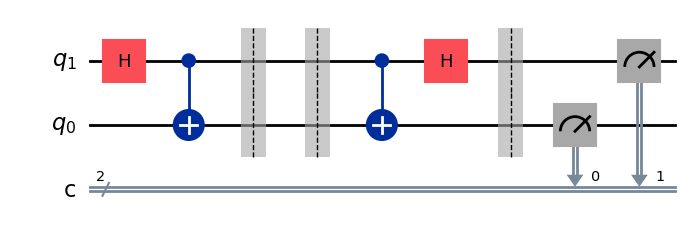

00 --> {'00': 100} 




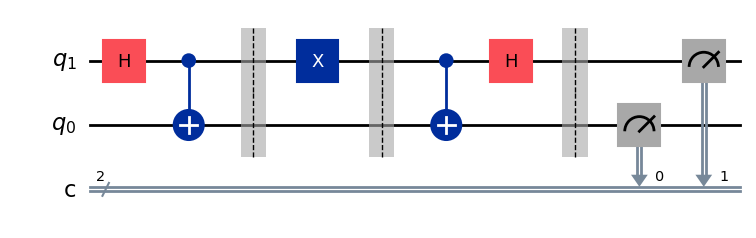

01 --> {'01': 100} 




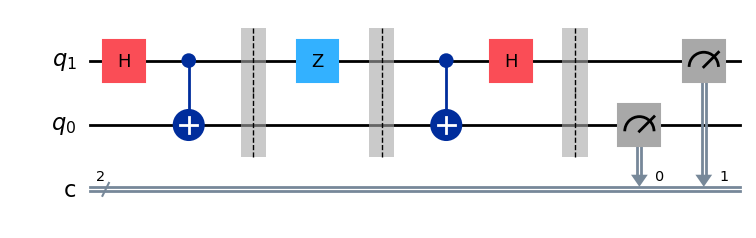

10 --> {'10': 100} 




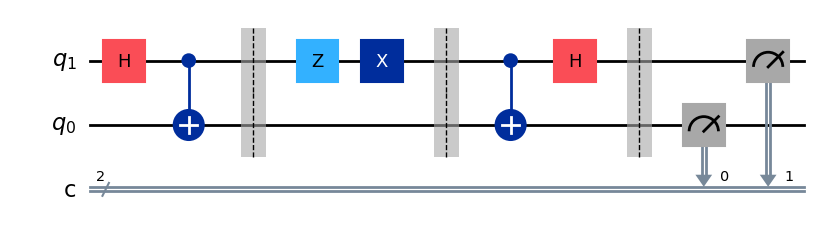

11 --> {'11': 100} 




In [ ]:
all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    q = QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])

    # apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])
    # barrier
    qc.barrier()

    # they are separated from each other now

    # if a is 1, then apply z-gate to Asja's qubit
    if pair[0]=='1':
        qc.z(q[1])

    # if b is 1, then apply x-gate (NOT) to Asja's qubit
    if pair[1]=='1':
        qc.x(q[1])

    # Asja sends her qubit to Balvis
    qc.barrier()

    #  apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])

    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])

    # measure both qubits
    qc.barrier()
    qc.measure(q,c)

    # draw the circuit in Qiskit's reading order
    display(qc.draw(output='mpl',reverse_bits=True))

    # compare the results with pair (a,b)
    job = AerSimulator().run(qc,shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts,'\n')
    print()

#### Qiskit order!

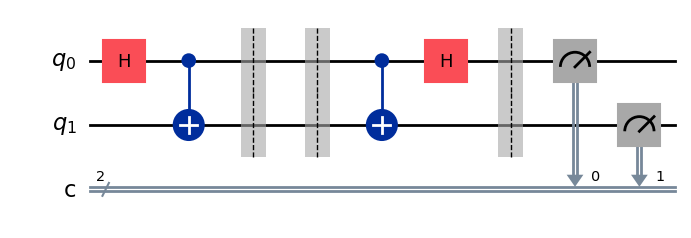

00 --> {'00': 100} 




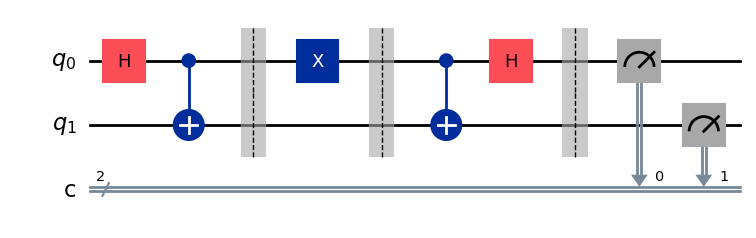

01 --> {'10': 100} 




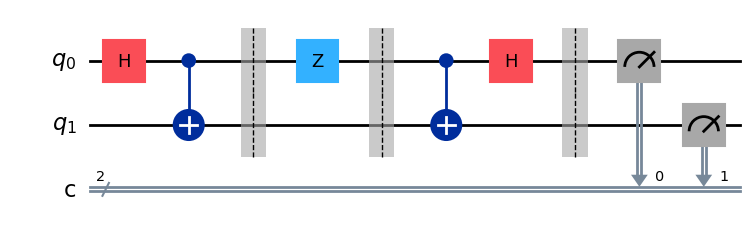

10 --> {'01': 100} 




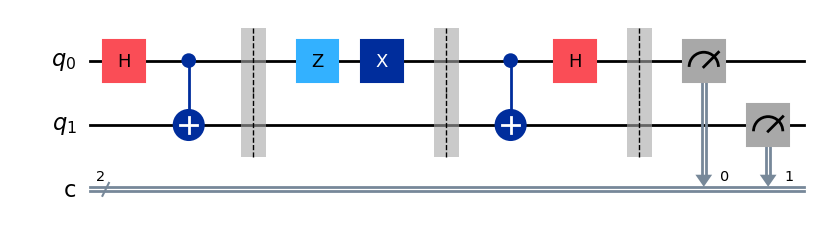

11 --> {'11': 100} 




In [ ]:
all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    q = QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[0])

    # apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[0],q[1])
    # barrier
    qc.barrier()

    # they are separated from each other now

    # if a is 1, then apply z-gate to Asja's qubit
    if pair[0]=='1':
        qc.z(q[0])

    # if b is 1, then apply x-gate (NOT) to Asja's qubit
    if pair[1]=='1':
        qc.x(q[0])

    # Asja sends her qubit to Balvis
    qc.barrier()

    #  apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[0],q[1])

    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[0])

    # measure both qubits
    qc.barrier()
    qc.measure(q,c)

    # draw the circuit in Qiskit's reading order
    display(qc.draw(output='mpl'))

    # compare the results with pair (a,b)
    job = AerSimulator().run(qc,shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts,'\n')
    print()

## Quantum teleportation

### QWorld (QBronze) Version

the picked angle is 302.40000000000003 degrees and 5.277875658030852 radians
a= 0.536 b= -0.844
a*a= 0.287 b*b= 0.713


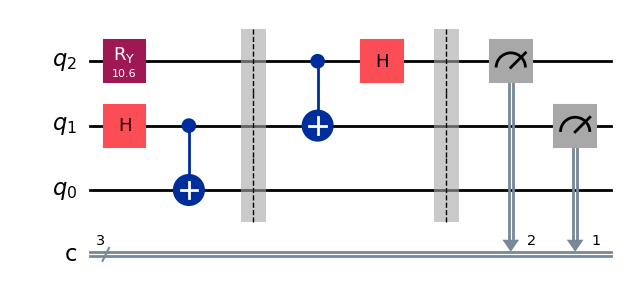

the state vector is
0.0
-0.0
-0.8443279255020154
0.535826794978996
0.0
0.0
0.0
0.0

the classical outcome is 01

the new quantum state is |01>(-0.844|0>+0.536|1>) 

the new quantum state is |01>(+b|0>+a|1>)


In [ ]:
# quantum circuit with three qubits and three bits
q =  QuantumRegister(3,"q")
c = ClassicalRegister(3,"c")
qc = QuantumCircuit(q,c)

# rotate the first qubit by random angle
r = randrange(100)
theta = 2*pi*(r/100) # radians
print("the picked angle is",r*3.6,"degrees and",theta,"radians")
a = cos(theta)
b = sin(theta)
print("a=",round(a,3),"b=",round(b,3))
print("a*a=",round(a**2,3),"b*b=",round(b**2,3))
qc.ry(2*theta,q[2])

# creating an entanglement between q[1] and q[0]
qc.h(q[1])
qc.cx(q[1],q[0])
qc.barrier()

# CNOT operator by Asja on her qubits where q[2] is the control qubit
qc.cx(q[2],q[1])

# Hadamard operator by Asja on q[2]
qc.h(q[2])

qc.barrier()

# the measurement done by Asja
qc.measure(q[2],c[2])
qc.measure(q[1],c[1])

# draw thw circuit
display(qc.draw(output='mpl',reverse_bits=True))

# read the state vector
job = StatevectorSimulator().run(qc,optimization_level=0,shots=1)
current_quantum_state=job.result().get_statevector(qc).data
print("the state vector is")
for i in range(len(current_quantum_state)):
    print(current_quantum_state[i].real)
print()

classical_outcomes = ['00','01','10','11']

for i in range(4):
    if (current_quantum_state[2*i].real != 0) or (current_quantum_state[2*i+1].real != 0):
        print("the classical outcome is",classical_outcomes[i])
        classical_outcome = classical_outcomes[i]
        balvis_state = [ current_quantum_state[2*i].real,current_quantum_state[2*i+1].real ]
print()

readable_quantum_state = "|"+classical_outcome+">"
readable_quantum_state += "("+str(round(balvis_state[0],3))+"|0>+"+str(round(balvis_state[1],3))+"|1>)"
print("the new quantum state is",readable_quantum_state,"\n")

all_states = ['000','001','010','011','100','101','110','111']

balvis_state_str = "|"+classical_outcome+">("
for i in range(len(current_quantum_state)):
    if abs(current_quantum_state[i].real-a)<0.000001:
        balvis_state_str += "+a|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real+a)<0.000001:
        balvis_state_str += "-a|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real-b)<0.000001:
        balvis_state_str += "+b|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real+b)<0.000001:
        balvis_state_str += "-b|"+ all_states[i][2]+">"
balvis_state_str += ")"
print("the new quantum state is",balvis_state_str)

### Qiskit Version
https://learning.quantum.ibm.com/course/basics-of-quantum-information/entanglement-in-action#teleportation

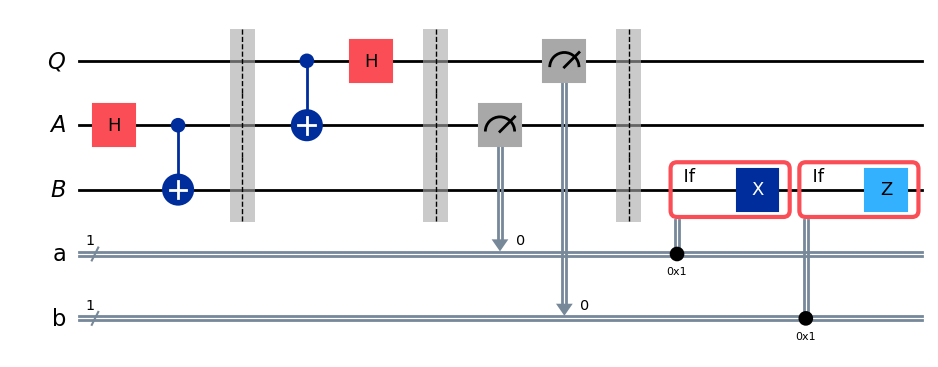

In [ ]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw('mpl'))

In [ ]:
random_gate = UGate(theta=random.random() * 2 * pi,phi=random.random() * 2 * pi, lam=random.random() * 2 * pi, label='random_gate')
print(random_gate,"\n")

display(random_gate.to_matrix())

Instruction(name='u', num_qubits=1, num_clbits=0, params=[2.35273401062652, 0.05995019869527729, 5.3698245141955905]) 



array([[ 0.38428139+0.j        , -0.56416709+0.73078267j],
       [ 0.92155748+0.05531384j,  0.25263312-0.28956639j]])

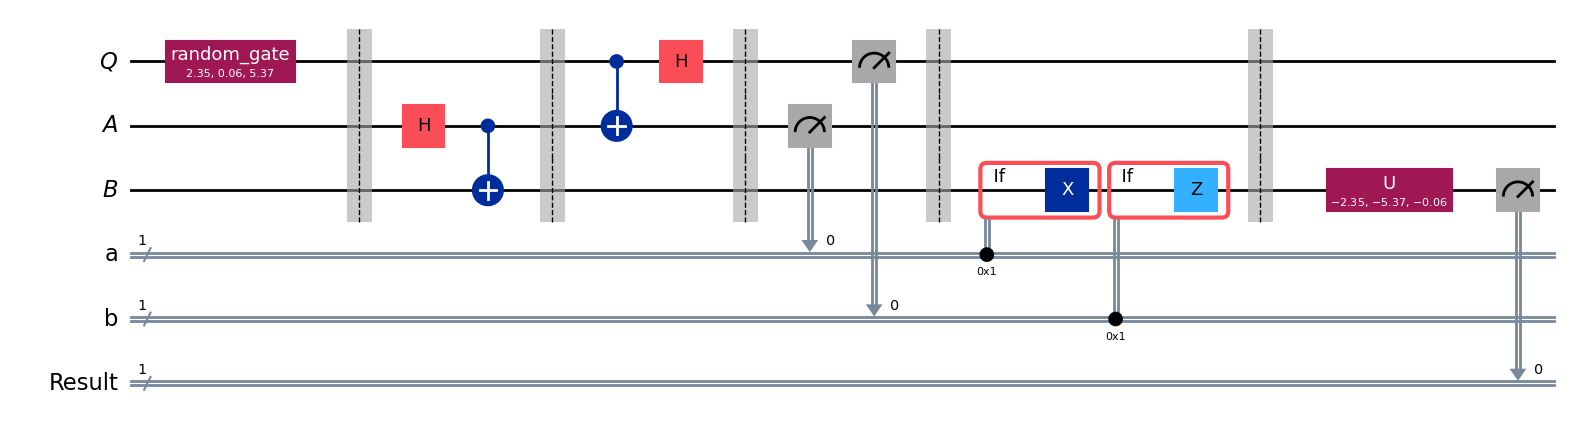

In [ ]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw('mpl'))

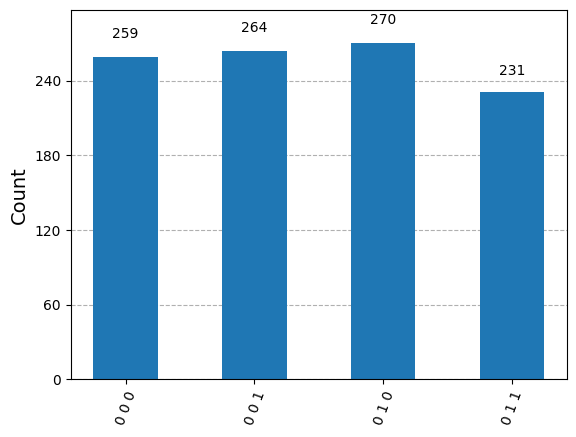

In [ ]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

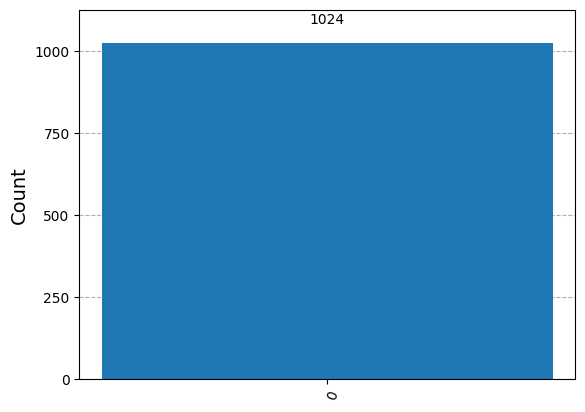

In [ ]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))